# Download the Dataset

In [1]:
!wget https://s3.ap-south-1.amazonaws.com/dl-assignment/data.tar.gz

--2019-09-16 01:55:12--  https://s3.ap-south-1.amazonaws.com/dl-assignment/data.tar.gz
Resolving s3.ap-south-1.amazonaws.com (s3.ap-south-1.amazonaws.com)... 52.219.62.93
Connecting to s3.ap-south-1.amazonaws.com (s3.ap-south-1.amazonaws.com)|52.219.62.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91386960 (87M) [application/x-gzip]
Saving to: ‘data.tar.gz’

data.tar.gz         100%[===================>]  87.15M  12.5MB/s    in 8.5s    

2019-09-16 01:55:22 (10.3 MB/s) - ‘data.tar.gz’ saved [91386960/91386960]



# Clone FlixNet repo

In [2]:
!git clone https://github.com/pratikadarsh/FlixNet

Cloning into 'FlixNet'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 89 (delta 39), reused 73 (delta 23), pack-reused 0
Unpacking objects: 100% (89/89), done.


In [3]:
!mv data.tar.gz FlixNet/dataset/
%cd FlixNet/dataset
!tar -xvf data.tar.gz
%cd ../

/content/FlixNet/dataset
data/
data/images/
data/images/11497676749486-INDICODE-Men-Tshirts-6011497676749351-5.jpg
data/images/11511442562519-Moda-Rapido-Men-Black-Solid-Round-Neck-Longline-T-shirt-3021511442562398-1.jpg
data/images/b84fa884-ce32-4e81-ac8d-cf8d22e12b391531894170906-Ajile-by-Pantaloons-Mens-T-shirt-1911531894170815-5.jpg
data/images/11498808186881-Huetrap-Men-White--Black-Printed-Round-Neck-T-shirt-9941498808186003-3.jpg
data/images/11519991145252-Numero-Uno-Men-Tshirts-3331519991145132-4.jpg
data/images/11499940328711-INVICTUS-Men-Navy-Blue-Printed-Polo-Collar-T-shirt-9101499940328565-2.jpg
data/images/32d9e193-18d1-4f77-90a3-b04b53a1ca771527137498073-HRX-by-Hrithik-Roshan-Men-Grey--Black-Colourblocked-Polo-Collar-T-shirt-5591527137495984-1.jpg
data/images/11492757252523-ALCOTT-Men-Green-Solid-Round-Neck-T-shirt-7821492757252375-3.jpg
data/images/11516784735409-PostFold-Mens-Solid-Cotton-Casual-Tshirts-2171516784735259-4.jpg
data/images/GRITSTONES-Men-Tshirts_73005ca7c

# Data Augmentation

Here, multiple image processing operations are applied to each image such as center crop, random crop, normalize, horizontal flip etc to augment the dataset.

In [4]:
import pandas as pd
from data.augment import preprocess
import os

data = pd.read_csv("dataset/data/attributes.csv")
data_copy = data.copy()
for index, row in data.iterrows():
  aug_images = preprocess(os.path.join("dataset/data/images", row.filename))
  for img_path in aug_images:
    data_copy = data_copy.append({'filename':os.path.basename(img_path),
                                  'neck': row.neck, 'sleeve_length':row.sleeve_length, 'pattern':row.pattern}, ignore_index=True)
data_copy = data_copy.sample(frac=1).reset_index()
data_copy.to_csv("dataset/data/attributes.csv")

File dataset/data/images/11495010560702-The-Indian-Garage-Co-Men-Tshirts-7851495010560569-2.jpg doesn't exist.


# Train FlixNet

In [7]:
!pip install wget
!python flixNet.py --mode train --images dataset/data/images/ --csv dataset/data/attributes.csv --batch_size 64 --epochs 15

Using TensorFlow backend.





2019-09-16 03:06:13.333524: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2019-09-16 03:06:13.333917: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1972bc0 executing computations on platform Host. Devices:
2019-09-16 03:06:13.333950: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-09-16 03:06:13.335990: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-09-16 03:06:13.426976: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-09-16 03:06:13.428892: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5a79500 executing computations on platform CUDA. Devices:
2019-09-16 03:06:13.428928: I tensorflow/compiler/xla/servic

**Note**: Training was stopped at 12 epochs well before the targeted 20 epochs due to the high accuracy levels achieved. Further training would lead to overfitting.

# Training Loss Log


graphs in order: overall loss, neck loss, sleeve length loss, pattern loss.

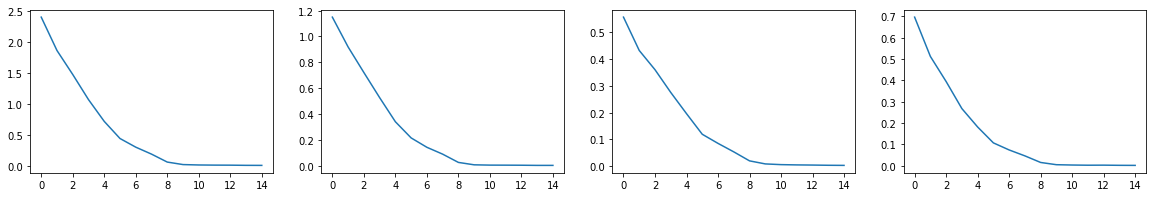

In [8]:
import matplotlib.pyplot as plot 

history = pd.read_csv("logs/history.csv")

plots = [history.loss,
         history.neck_output_loss,
         history.sleeve_output_loss,
         history.pattern_output_loss]
row = 1
col = 4
fig = plot.figure(figsize=(20, 3))
for i in range(col):
  
  fig.add_subplot(row, col,i+1)
  plot.plot(plots[i])
plot.show()

# Training Accuracy Logs

graphs in order: neck accuracy, sleeve length accuracy, pattern accuracy.

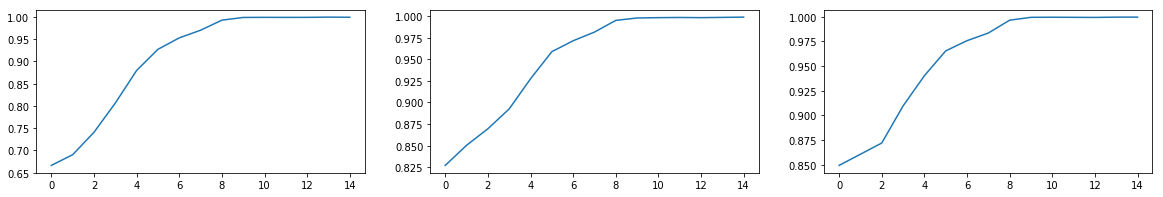

In [9]:
plots = [history.neck_output_acc,
         history.sleeve_output_acc,
         history.pattern_output_acc]
row = 1
col = 3
fig = plot.figure(figsize=(20, 3))
for i in range(col):
  
  fig.add_subplot(row, col,i+1)
  plot.plot(plots[i])
plot.show()

# Validation Loss Logs

graphs in order: overall validation loss, neck loss, sleeve length loss, pattern loss

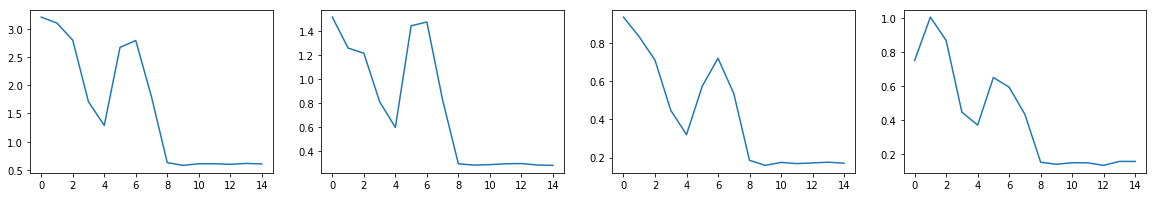

In [10]:
plots = [history.val_loss,
         history.val_neck_output_loss,
         history.val_sleeve_output_loss,
         history.val_pattern_output_loss]
row = 1
col = 4
fig = plot.figure(figsize=(20, 3))
for i in range(col):
  
  fig.add_subplot(row, col,i+1)
  plot.plot(plots[i])
plot.show()

# Validation Accuracy Logs

graphs in order: neck accuracy, sleeve length accuracy, pattern accuracy

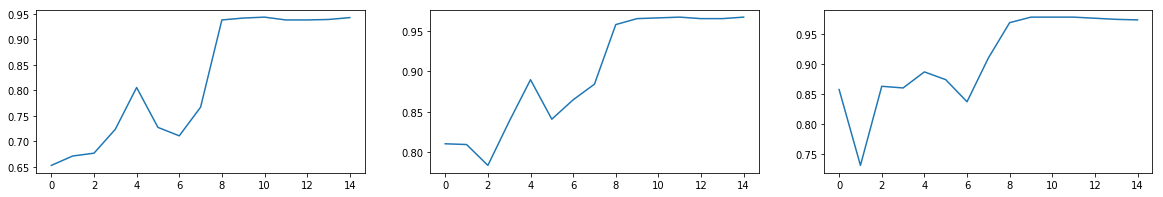

In [11]:
plots = [history.val_neck_output_acc,
         history.val_sleeve_output_acc,
         history.val_pattern_output_acc]
row = 1
col = 3
fig = plot.figure(figsize=(20, 3))
for i in range(col):
  
  fig.add_subplot(row, col,i+1)
  plot.plot(plots[i])
plot.show()

# FlixNet Inference on sample images.

In [12]:
!python flixNet.py --mode test --images sample_images/ --saved_weights models/flixNet.h5

Using TensorFlow backend.





2019-09-16 04:12:32.896437: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2019-09-16 04:12:32.896857: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2faabc0 executing computations on platform Host. Devices:
2019-09-16 04:12:32.896904: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-09-16 04:12:32.915605: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-09-16 04:12:32.995455: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-09-16 04:12:32.996345: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2faad80 executing computations on platform CUDA. Devices:
2019-09-16 04:12:32.996375: I tensorflow/compiler/xla/servic

# Inference output.

In [13]:
output = pd.read_csv("output.csv")
output.head()

,filename,neck,sleeve_length,pattern
0,m-tmrgyvnful-d22-tripr-original-imafh6haxymrra...,6,3,9
1,images.jpeg,6,0,9
2,xxl-awt1072b-aelomart-original-imafgqyfjf92b2u...,6,3,9
3,black-men-s-t-shirt-1000x1000h.jpg,6,3,9
4,saffdsf.jpeg,6,3,9
